In [1]:
install.packages('gsheet')
library(tidyverse)
library(cowplot)
library(scales)
library(gsheet)
library(repr)
data <- gsheet2tbl('docs.google.com/spreadsheets/d/1nNlzfwXkHVk2i946pgf3247KT2vqCDfHZjrBjT-losg/edit?usp=sharing')
numeric_data <- select_if(data,is.numeric)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘cowplot’ was built under R version 4.0.3”

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
head(data,6)
colnames(data)
head(numeric_data,6)
colnames(numeric_data)

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


[1] "Id"            "MSSubClass"    "MSZoning"      "LotFrontage"  
 [5] "LotArea"       "Street"        "Alley"         "LotShape"     
 [9] "LandContour"   "Utilities"     "LotConfig"     "LandSlope"    
[13] "Neighborhood"  "Condition1"    "Condition2"    "BldgType"     
[17] "HouseStyle"    "OverallQual"   "OverallCond"   "YearBuilt"    
[21] "YearRemodAdd"  "RoofStyle"     "RoofMatl"      "Exterior1st"  
[25] "Exterior2nd"   "MasVnrType"    "MasVnrArea"    "ExterQual"    
[29] "ExterCond"     "Foundation"    "BsmtQual"      "BsmtCond"     
[33] "BsmtExposure"  "BsmtFinType1"  "BsmtFinSF1"    "BsmtFinType2" 
[37] "BsmtFinSF2"    "BsmtUnfSF"     "TotalBsmtSF"   "Heating"      
[41] "HeatingQC"     "CentralAir"    "Electrical"    "1stFlrSF"     
[45] "2ndFlrSF"      "LowQualFinSF"  "GrLivArea"     "BsmtFullBath" 
[49] "BsmtHalfBath"  "FullBath"      "HalfBath"      "BedroomAbvGr" 
[53] "KitchenAbvGr"  "KitchenQual"   "TotRmsAbvGrd"  "Functional"   
[57] "Fireplaces"    "FireplaceQu"   "GarageType"    "GarageYrBlt"  
[61] "GarageFinish"  "GarageCars"    "GarageArea"    "GarageQual"   
[65] "GarageCond"    "PavedDrive"    "WoodDeckSF"    "OpenPorchSF"  
[69] "EnclosedPorch" "3SsnPorch"     "ScreenPorch"   "PoolArea"     
[73] "PoolQC"        "Fence"         "MiscFeature"   "MiscVal"      
[77] "MoSold"        "YrSold"        "SaleType"      "SaleCondition"
[81] "SalePrice"

Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,⋯,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,60,65,8450,7,5,2003,2003,196,706,⋯,0,61,0,0,0,0,0,2,2008,208500
2,20,80,9600,6,8,1976,1976,0,978,⋯,298,0,0,0,0,0,0,5,2007,181500
3,60,68,11250,7,5,2001,2002,162,486,⋯,0,42,0,0,0,0,0,9,2008,223500
4,70,60,9550,7,5,1915,1970,0,216,⋯,0,35,272,0,0,0,0,2,2006,140000
5,60,84,14260,8,5,2000,2000,350,655,⋯,192,84,0,0,0,0,0,12,2008,250000
6,50,85,14115,5,5,1993,1995,0,732,⋯,40,30,0,320,0,0,700,10,2009,143000


[1] "Id"            "MSSubClass"    "LotFrontage"   "LotArea"      
 [5] "OverallQual"   "OverallCond"   "YearBuilt"     "YearRemodAdd" 
 [9] "MasVnrArea"    "BsmtFinSF1"    "BsmtFinSF2"    "BsmtUnfSF"    
[13] "TotalBsmtSF"   "1stFlrSF"      "2ndFlrSF"      "LowQualFinSF" 
[17] "GrLivArea"     "BsmtFullBath"  "BsmtHalfBath"  "FullBath"     
[21] "HalfBath"      "BedroomAbvGr"  "KitchenAbvGr"  "TotRmsAbvGrd" 
[25] "Fireplaces"    "GarageYrBlt"   "GarageCars"    "GarageArea"   
[29] "WoodDeckSF"    "OpenPorchSF"   "EnclosedPorch" "3SsnPorch"    
[33] "ScreenPorch"   "PoolArea"      "MiscVal"       "MoSold"       
[37] "YrSold"        "SalePrice"

In [24]:
has_feature_vs_price <- numeric_data %>%
    mutate(HasDeck = WoodDeckSF > 0,HasPorch = (OpenPorchSF > 0 | EnclosedPorch > 0 | ScreenPorch > 0), HasPool = PoolArea > 0) %>%
    select(HasDeck, HasPorch, HasPool, SalePrice) %>%
    group_by(HasDeck,HasPorch,HasPool) %>%
    summarize(SalePrice = mean(SalePrice,na.rm=TRUE))
    

has_feature_vs_price

`summarise()` regrouping output by 'HasDeck', 'HasPorch' (override with `.groups` argument)



HasDeck,HasPorch,HasPool,SalePrice,NumFeatures
<lgl>,<lgl>,<lgl>,<dbl>,<dbl>
FALSE,FALSE,FALSE,136509.2,0
FALSE,TRUE,FALSE,169133.4,1
FALSE,TRUE,TRUE,242500.0,2
TRUE,FALSE,FALSE,158581.0,1
TRUE,FALSE,TRUE,176000.0,2
TRUE,TRUE,FALSE,224395.7,2
TRUE,TRUE,TRUE,393323.3,3


`summarise()` ungrouping output (override with `.groups` argument)



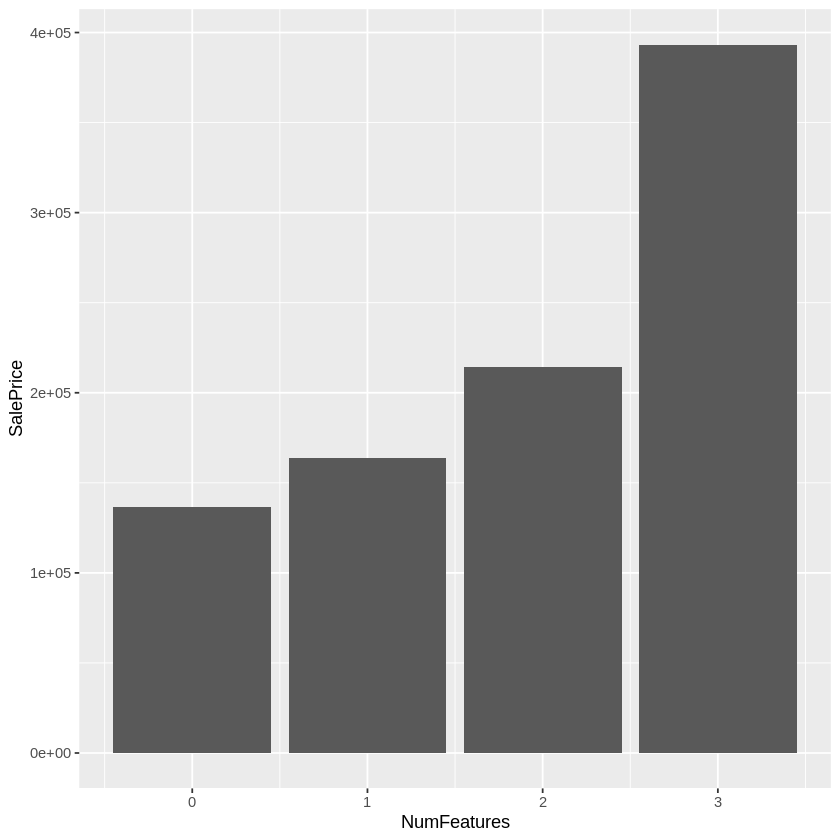

In [25]:
num_special_features <- has_feature_vs_price %>%
    bind_cols(NumFeatures = c(0,1,2,1,2,2,3)) %>%
    group_by(NumFeatures) %>%
    summarize(SalePrice = mean(SalePrice, na.rm=TRUE))

has_feature_vs_price_plot <- ggplot(num_special_features, aes(x=NumFeatures,y=SalePrice)) +
    geom_bar(stat="identity")
has_feature_vs_price_plot

In [17]:
only_averageable_data <- numeric_data %>%
    select(LotArea , OverallQual , OverallCond , GrLivArea, GarageArea , WoodDeckSF , OpenPorchSF , SalePrice)

average_for_each <- only_averageable_data %>%
    summarise_all(mean,na.rm =TRUE)
average_for_each

LotArea,OverallQual,OverallCond,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10516.83,6.099315,5.575342,1515.464,472.9801,94.24452,46.66027,180921.2


In [11]:
reno_year_vs_price <- numeric_data %>%
    select(YearRemodAdd, SalePrice) %>%
    group_by(YearRemodAdd) %>%
    summarize(SalePrice = mean(SalePrice, na.rm = TRUE))
head(reno_year_vs_price)
tail(reno_year_vs_price)

`summarise()` ungrouping output (override with `.groups` argument)



YearRemodAdd,SalePrice
<dbl>,<dbl>
1950,117463.1
1951,129975.0
1952,110398.6
1953,147640.0
1954,121142.9
1955,124511.1


YearRemodAdd,SalePrice
<dbl>,<dbl>
2005,210542.9
2006,229471.1
2007,224807.2
2008,269709.1
2009,284085.4
2010,336963.5


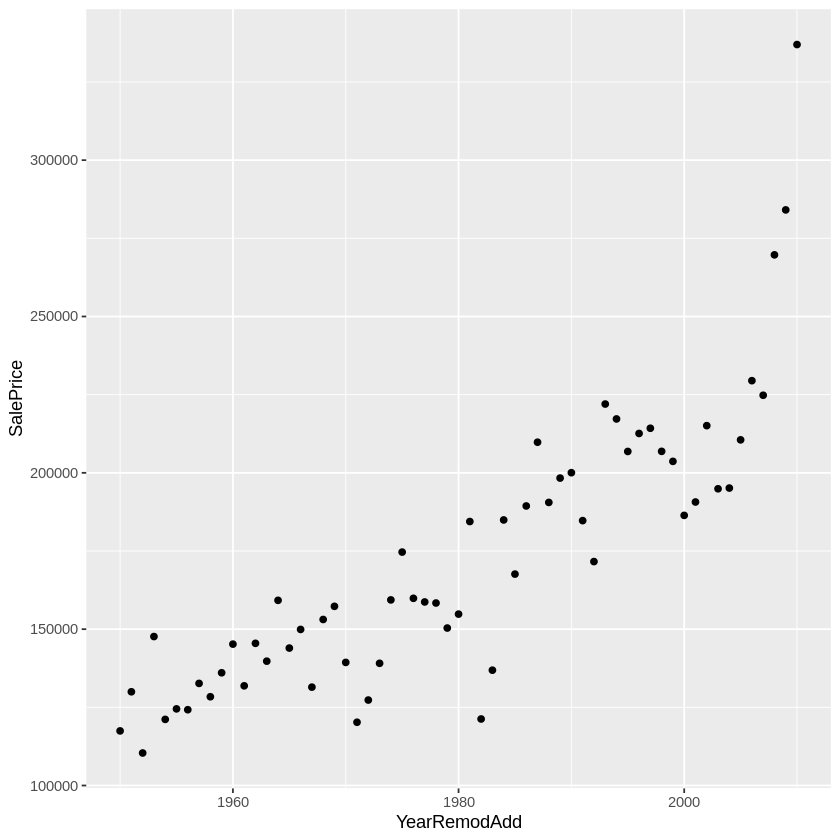

In [13]:
reno_year_vs_price_plot <- ggplot(reno_year_vs_price, aes(x=YearRemodAdd, y = SalePrice)) +
    geom_point()
reno_year_vs_price_plot

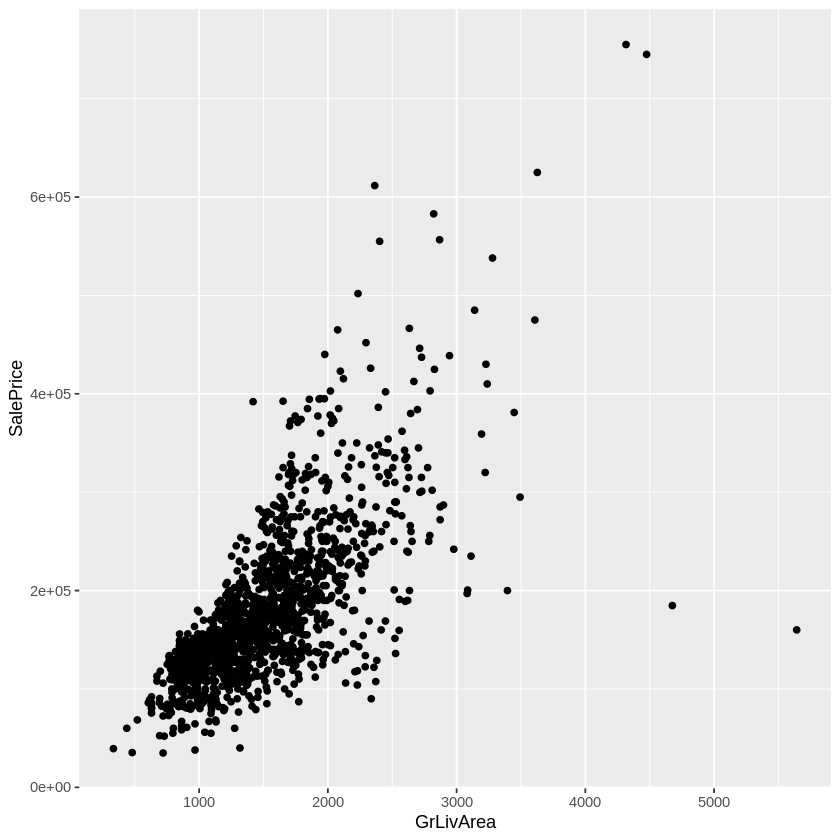

In [10]:
living_space_vs_price <- ggplot(data,aes(x=GrLivArea,y=SalePrice)) +
    geom_point()
living_space_vs_price

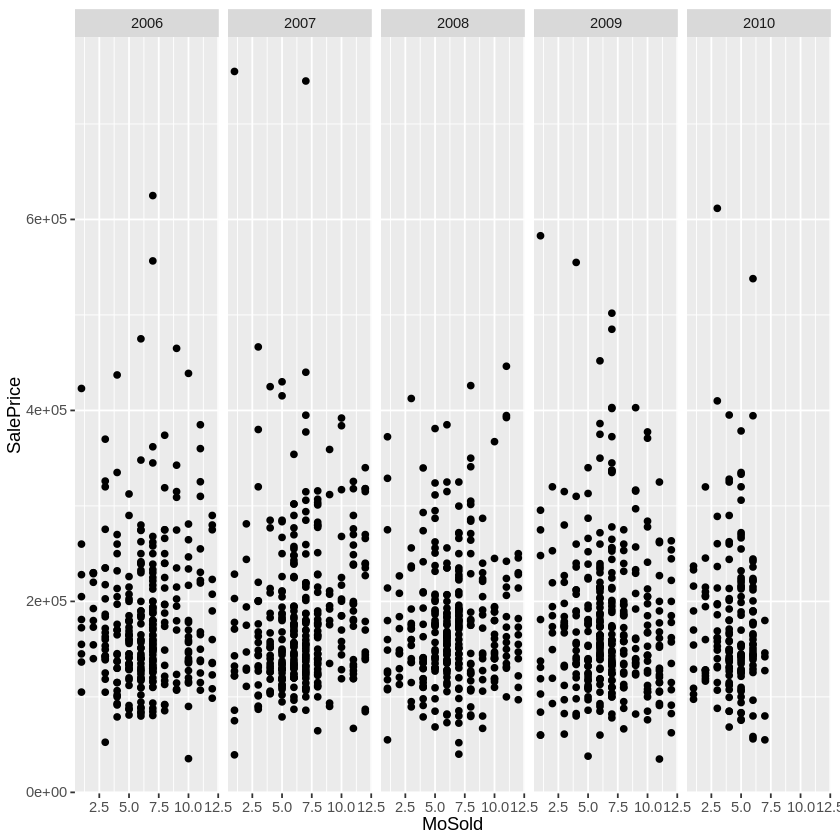

In [6]:
time_of_year_plot <- ggplot(data,aes(x=MoSold,y=SalePrice)) +
    geom_point() +
    facet_grid(. ~ YrSold)

time_of_year_plot

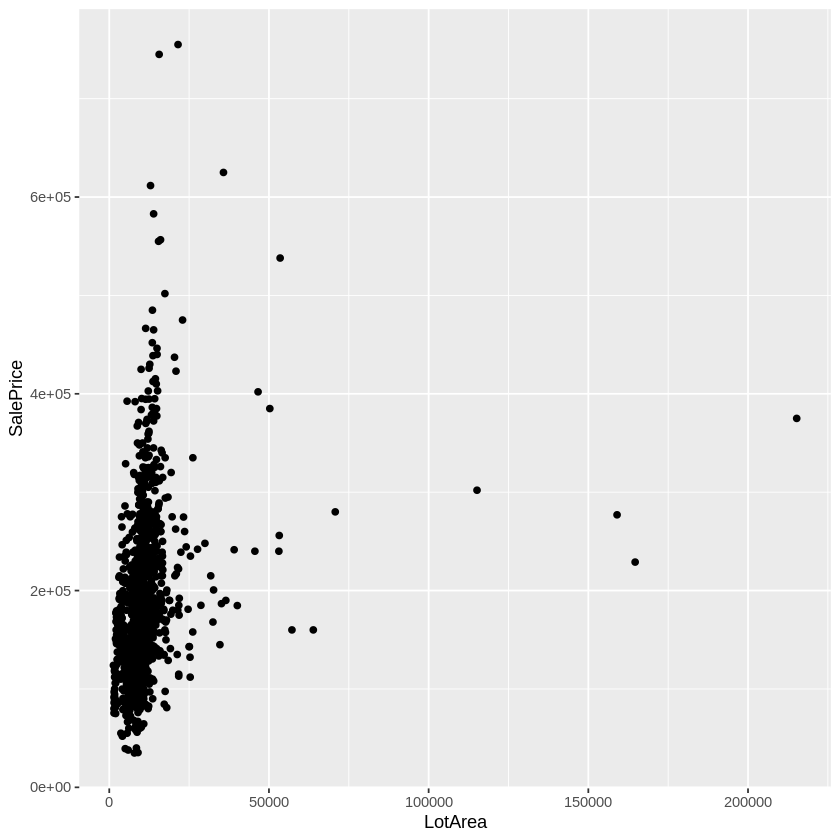

In [12]:
lot_area_vs_price <- ggplot(data,aes(x=LotArea,y=SalePrice)) +
    geom_point()
lot_area_vs_price

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 8)
all_temp_plot <- tidy_temp %>% 
    ggplot(aes(x = Year, y = Temperature)) + 
    geom_point() + 
    facet_wrap(~ factor(Month, levels = c("Jan","Feb","Mar","Apr","May","Jun",
                                          "Jul","Aug","Sep","Oct","Nov","Dec"))) +
    xlab("Year") + 
    ylab("Temperature (C)") +
    theme(text = element_text(size=20))


all_temp_plot